# 基于新数据的迁移学习实战
任务：基于transfer_data.csv数据，建立mlp模型，再实现模型迁移学习  
1、实现x对y的预测，可视化结果  
2、基于新数据transfer_data2.csv,对前模型进行二次训练，对比模型训练次数少的情况下的表现  
模型结构：mlp，两个隐藏层，每层50个神经元，激活函数relu，输出层激活函数linear，迭代次数100次

In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('transfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


In [2]:
#difine X and y
X = np.array(data['x']).reshape(-1, 1)
y = data['y']

Text(0, 0.5, 'y')

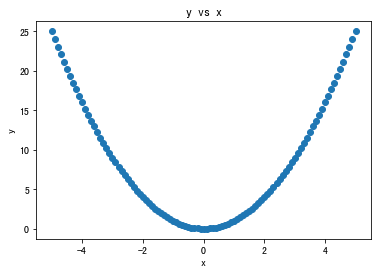

In [3]:
#visualize the data
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X, y, label='data1')
ax.set_title('y vs x')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [5]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(units=50, input_dim=1, activation='relu'))
model1.add(Dense(units=50, activation='relu'))
model1.add(Dense(units=1, activation='linear'))
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [8]:
#train the model
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
model1.fit(X, y, epochs=200)

Epoch 1/200
101/101 [==============================] - 0s 283us/step - loss: 0.6125
Epoch 2/200
101/101 [==============================] - 0s 203us/step - loss: 0.5945
Epoch 3/200
101/101 [==============================] - 0s 222us/step - loss: 0.5784
Epoch 4/200
101/101 [==============================] - 0s 211us/step - loss: 0.5647
Epoch 5/200
101/101 [==============================] - 0s 256us/step - loss: 0.5717
Epoch 6/200
101/101 [==============================] - 0s 212us/step - loss: 0.5587
Epoch 7/200
101/101 [==============================] - 0s 229us/step - loss: 0.5463
Epoch 8/200
101/101 [==============================] - 0s 203us/step - loss: 0.5311
Epoch 9/200
101/101 [==============================] - 0s 254us/step - loss: 0.5281
Epoch 10/200
101/101 [==============================] - 0s 256us/step - loss: 0.5161
Epoch 11/200
101/101 [==============================] - 0s 282us/step - loss: 0.5015
Epoch 12/200
101/101 [==============================] - 0s 217us/step - lo

101/101 [==============================] - 0s 223us/step - loss: 0.1505
Epoch 98/200
101/101 [==============================] - 0s 235us/step - loss: 0.1460
Epoch 99/200
101/101 [==============================] - 0s 253us/step - loss: 0.1412
Epoch 100/200
101/101 [==============================] - 0s 288us/step - loss: 0.1416
Epoch 101/200
101/101 [==============================] - 0s 253us/step - loss: 0.1365
Epoch 102/200
101/101 [==============================] - 0s 245us/step - loss: 0.1385
Epoch 103/200
101/101 [==============================] - 0s 300us/step - loss: 0.1451
Epoch 104/200
101/101 [==============================] - 0s 219us/step - loss: 0.1464
Epoch 105/200
101/101 [==============================] - 0s 190us/step - loss: 0.1348
Epoch 106/200
101/101 [==============================] - 0s 174us/step - loss: 0.1319
Epoch 107/200
101/101 [==============================] - 0s 167us/step - loss: 0.1364
Epoch 108/200
101/101 [==============================] - 0s 201us/step

101/101 [==============================] - 0s 206us/step - loss: 0.0577
Epoch 193/200
101/101 [==============================] - 0s 192us/step - loss: 0.0540
Epoch 194/200
101/101 [==============================] - 0s 195us/step - loss: 0.0528
Epoch 195/200
101/101 [==============================] - 0s 245us/step - loss: 0.0514
Epoch 196/200
101/101 [==============================] - 0s 180us/step - loss: 0.0500
Epoch 197/200
101/101 [==============================] - 0s 204us/step - loss: 0.0498
Epoch 198/200
101/101 [==============================] - 0s 233us/step - loss: 0.0501
Epoch 199/200
101/101 [==============================] - 0s 214us/step - loss: 0.0494
Epoch 200/200
101/101 [==============================] - 0s 192us/step - loss: 0.0550


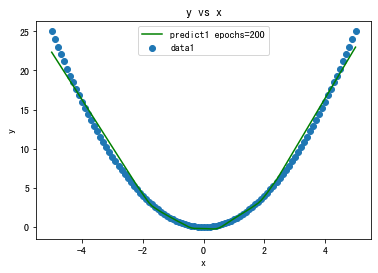

In [7]:
#make prediction
y_predict = model1.predict(X)
ax.plot(X, y_predict, 'g', label='predict1 epochs=200')
ax.legend()
fig

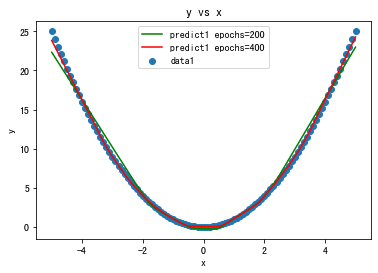

In [9]:
y_predict = model1.predict(X)
ax.plot(X, y_predict, 'r', label='predict1 epochs=400')
ax.legend()
fig

In [11]:
from sklearn.externals import joblib
joblib.dump(model1, 'model1.m')

['model1.m']

In [12]:
model2 = joblib.load('model1.m')
data2 = pd.read_csv('transfer_data2.csv')
X2 = np.array(data2['x2']).reshape(-1, 1)
y2 = data2['y2']

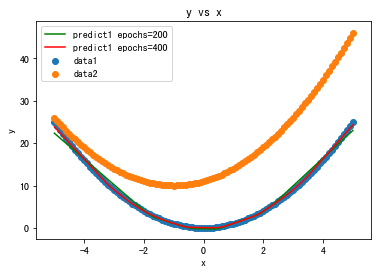

In [13]:
y2_predict = model2.predict(X2)
ax.scatter(X2, y2, label='data2')
ax.legend()
fig

In [16]:
model2.fit(X2, y2, epochs=20)

Epoch 1/20
101/101 [==============================] - 0s 278us/step - loss: 2.5044
Epoch 2/20
101/101 [==============================] - 0s 217us/step - loss: 2.2411
Epoch 3/20
101/101 [==============================] - 0s 208us/step - loss: 2.0223
Epoch 4/20
101/101 [==============================] - 0s 203us/step - loss: 1.7916
Epoch 5/20
101/101 [==============================] - 0s 203us/step - loss: 1.5801
Epoch 6/20
101/101 [==============================] - 0s 202us/step - loss: 1.3992
Epoch 7/20
101/101 [==============================] - 0s 191us/step - loss: 1.2505
Epoch 8/20
101/101 [==============================] - 0s 219us/step - loss: 1.1192
Epoch 9/20
101/101 [==============================] - 0s 216us/step - loss: 1.0075
Epoch 10/20
101/101 [==============================] - 0s 211us/step - loss: 0.8957
Epoch 11/20
101/101 [==============================] - 0s 298us/step - loss: 0.8079
Epoch 12/20
101/101 [==============================] - 0s 224us/step - loss: 0.7300
E

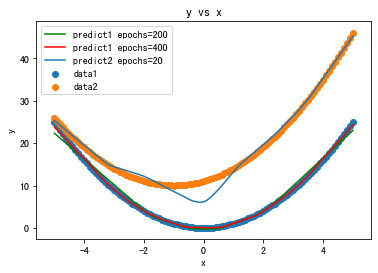

In [15]:
y2_predict = model2.predict(X2)
ax.plot(X2, y2_predict, label='predict2 epochs=20')
ax.legend()
fig

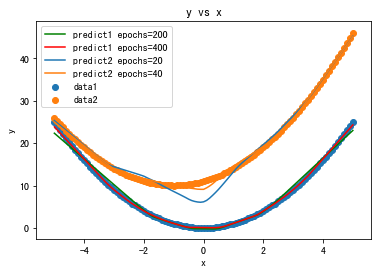

In [17]:
y2_predict = model2.predict(X2)
ax.plot(X2, y2_predict, label='predict2 epochs=40')
ax.legend()
fig

基于新数据的迁移学习实战summary:  
1、通过使用新数据，实现了模型的2次训练，达到了较好的预测效果  
2、建立mlp模型实现了非线性分布数据的回归预测  
3、掌握了模型存储与加载的方法  
4、通过迁移学习，可减少模型训练迭代次数，大幅缩短训练时间  